# 1. Binary classification

# 1.2 Self-programming 

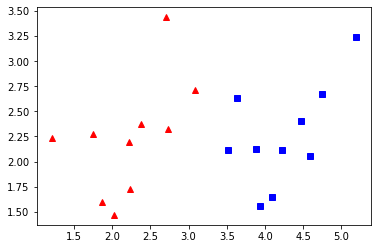

(2, 20)


In [24]:
import numpy as np 
import matplotlib.pyplot as plt
# Cho hạt cố định
np.random.seed(2)
#Chuẩn bị dữ liệu
means = [[2, 2], [4, 2]]#Cho center của cluster 1 và cluster 2
cov = [[0.3, 0.2], [0.2, 0.3]]# Ma trận hiệp phương sai của 2 cluster
N = 10
# Cluster của 1,2 có 2 chiều (x1,x2) nên ∈ R^10x2
cluster_1 = np.random.multivariate_normal(means[0], cov, N).T
cluster_2 = np.random.multivariate_normal(means[1], cov, N).T
# X ∈ R^20x2
X = np.concatenate((cluster_1, cluster_2), axis = 1)
# y ∈ R^20x2 là label có thứ tự 10 số đầu là 1, 10 số sau là -1
y = np.concatenate((np.ones((1, N)), -1*np.ones((1, N))), axis = 1)
# X_bar ∈ R^20x3 gắn thêm x0=1
X_bar= np.concatenate((np.ones((1, 2*N)), X), axis = 0)
plt.plot(X_bar[1,:10],X_bar[2,:10],'r^')
plt.plot(X_bar[1,10:],X_bar[2,10:],'bs')
plt.show()
print(X.shape)

In [3]:
""" Xây dựng hàm mát J(w)=∑_(Xi bị misclassifed)(-y_i*sign(w^T*x_i))
    Càng xa center thì bị trừng phạt càng nặng
    Đạo hàm của hàm mất mát ∇_w J(w;x_i;y_i)=-y_i*x_i
    Sử dụng stoschatic gradient descent cập nhật trọng số w=w+η*y_i*y_i
    Hàm active function :sign(giá trị>0)=1 and sign(giá trị<0)=-1
"""
def sign_function(w, x): 
    return np.sign(np.dot(w.T, x))

def stop_condition(X, y, w): #Điều kiện dừng mảng nhãn trộn được sắp xếp đúng theo từng lớp ban đầu  
    return np.array_equal(sign_function(w, X), y) 

def perceptron(X, y, w_init):
    w = [w_init] 
    N = X_bar.shape[1]# N=20
    d = X_bar.shape[0]# d=3
    mis_points = []# mảng xem thứ tự bị trộn
    while True:
        # Trộn dữ thứ tự 20 nhãn 
        mix_id = np.random.permutation(N)
        for i in range(N):
            xi = X_bar[:, mix_id[i]].reshape(d, 1)#Lấy xi random R^3x1
            yi = y[0, mix_id[i]]# Lấy nhãn ngẫu nhiên 
            if sign_function(w[-1], xi)[0] != yi: # So sánh hàm active function với nhãn bất kỳ
                mis_points.append(mix_id[i])
                w_new = w[-1] + yi*xi #Sử dụng gradient descent w[-1] ý là lấy trọng số cuối cùng 
                w.append(w_new)
                
        if stop_condition(X_bar, y, w[-1]):
            break
    return (w, mis_points)

d = X_bar.shape[0]
w_init = np.random.randn(d, 1)# Tao w0, w1, w2 ngẫu nhiên R^3x1
(w,m)= perceptron(X_bar, y, w_init)
iterative=len(w)
iterative,m


(17, [12, 2, 19, 9, 17, 5, 6, 18, 0, 17, 6, 3, 12, 1, 14, 4])

[3.73118467] [-5.81419847] [5.91742545]


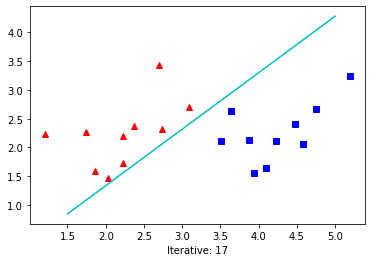

In [25]:
# Phương trình đường thẳng w0+x1*w1+x2*w2=0 (bằng 0 để tách ranh giới)
def draw_line(w):
    w0, w1, w2 = w[0], w[1], w[2]
    print(w0,w1,w2)
    x1, x2 = 1.5,5
    return plt.plot([x1, x2], [-(w1*x1 + w0)/w2, -(w1*x2 + w0)/w2], 'c')
plt.plot(X_bar[1,:10],X_bar[2,:10],'r^')
plt.plot(X_bar[1,10:],X_bar[2,10:],'bs')
plt.xlabel('Iterative: %d' %iterative)
draw_line(w[-1])

# Sử dụng thư viên scikit - learn

In [28]:
from sklearn.linear_model import Perceptron
per=Perceptron()
per.fit(X.T,y.T.ravel())
per.intercept_,per.coef_

(array([4.]), array([[-5.90016316,  5.83513953]]))

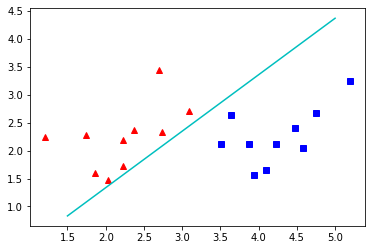

In [29]:
x1, x2 = 1.5,5
w0, w1, w2 = per.intercept_[0], per.coef_[0][0], per.coef_[0][1]
plt.plot(X_bar[1,:10],X_bar[2,:10],'r^')
plt.plot(X_bar[1,10:],X_bar[2,10:],'bs')
plt.plot([x1, x2], [-(w1*x1 + w0)/w2, -(w1*x2 + w0)/w2], 'c')

In [38]:
from sklearn.linear_model import SGDClassifier
sgd_clf=SGDClassifier(loss="perceptron")
sgd_clf.fit(X.T,y.T.ravel())
sgd_clf.intercept_,sgd_clf.coef_

(array([19.87224868]), array([[-29.73613516,  30.05265544]]))

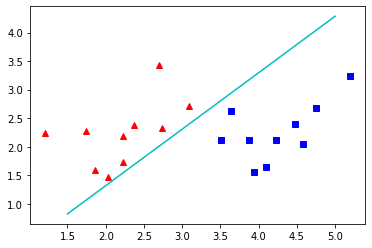

In [39]:
x1, x2 = 1.5,5
w0, w1, w2 = sgd_clf.intercept_[0], sgd_clf.coef_[0][0], sgd_clf.coef_[0][1]
plt.plot(X_bar[1,:10],X_bar[2,:10],'r^')
plt.plot(X_bar[1,10:],X_bar[2,10:],'bs')
plt.plot([x1, x2], [-(w1*x1 + w0)/w2, -(w1*x2 + w0)/w2], 'c')
plt.show()